# Parametrization for the EoS of f(R) model

## Preamble

In [1]:
%pylab inline
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
class FancyFormatter(Formatter):
    """Formater for values with LaTeX fonts."""

    def __call__(self, v, pos=None):
        return r'${:.5G}$'.format(v)

    def format_data_short(self, value):
        return '{:.1f}'.format(value)

## Datos

Tenemos dos archvos, uno con el rango completo de redshifts (o factor de escala), y otro donde hemos cortado el rango hasta $0\leq z \leq 3$

In [3]:
#  columna 1: redshift (z) 
#  columna 2: factor de escala en unidades de hoy (a/a_hoy)
#  columna 3: w_X  (P_x / \rho_X)
#  columna 4: w_total  (P_total/ \rho_total)
#  columna 5: H/H_hoy

HS1_data = np.loadtxt('./../../Input/weff-HS-m20-n4-f101.dat')
HS2_data = np.loadtxt('./../../Input/weff-HS-m25-n4-f101.dat')
HS3_data = np.loadtxt('./../../Input/weff-HS-m30-n4-f101.dat')

HS1=vectorize(HS1_data)
HS2=vectorize(HS2_data)
HS3=vectorize(HS3_data)

z1 = HS1_data[:,1]
z2 = HS2_data[:,1]
z3 = HS3_data[:,1]

wx1 = HS1_data[:,2]
wx2 = HS2_data[:,2]
wx3 = HS3_data[:,2]



(8.9741824500000007, -0.99999927300000002)

Vamos a ver cómo se ven las ecuaciones de estado $w(z)$

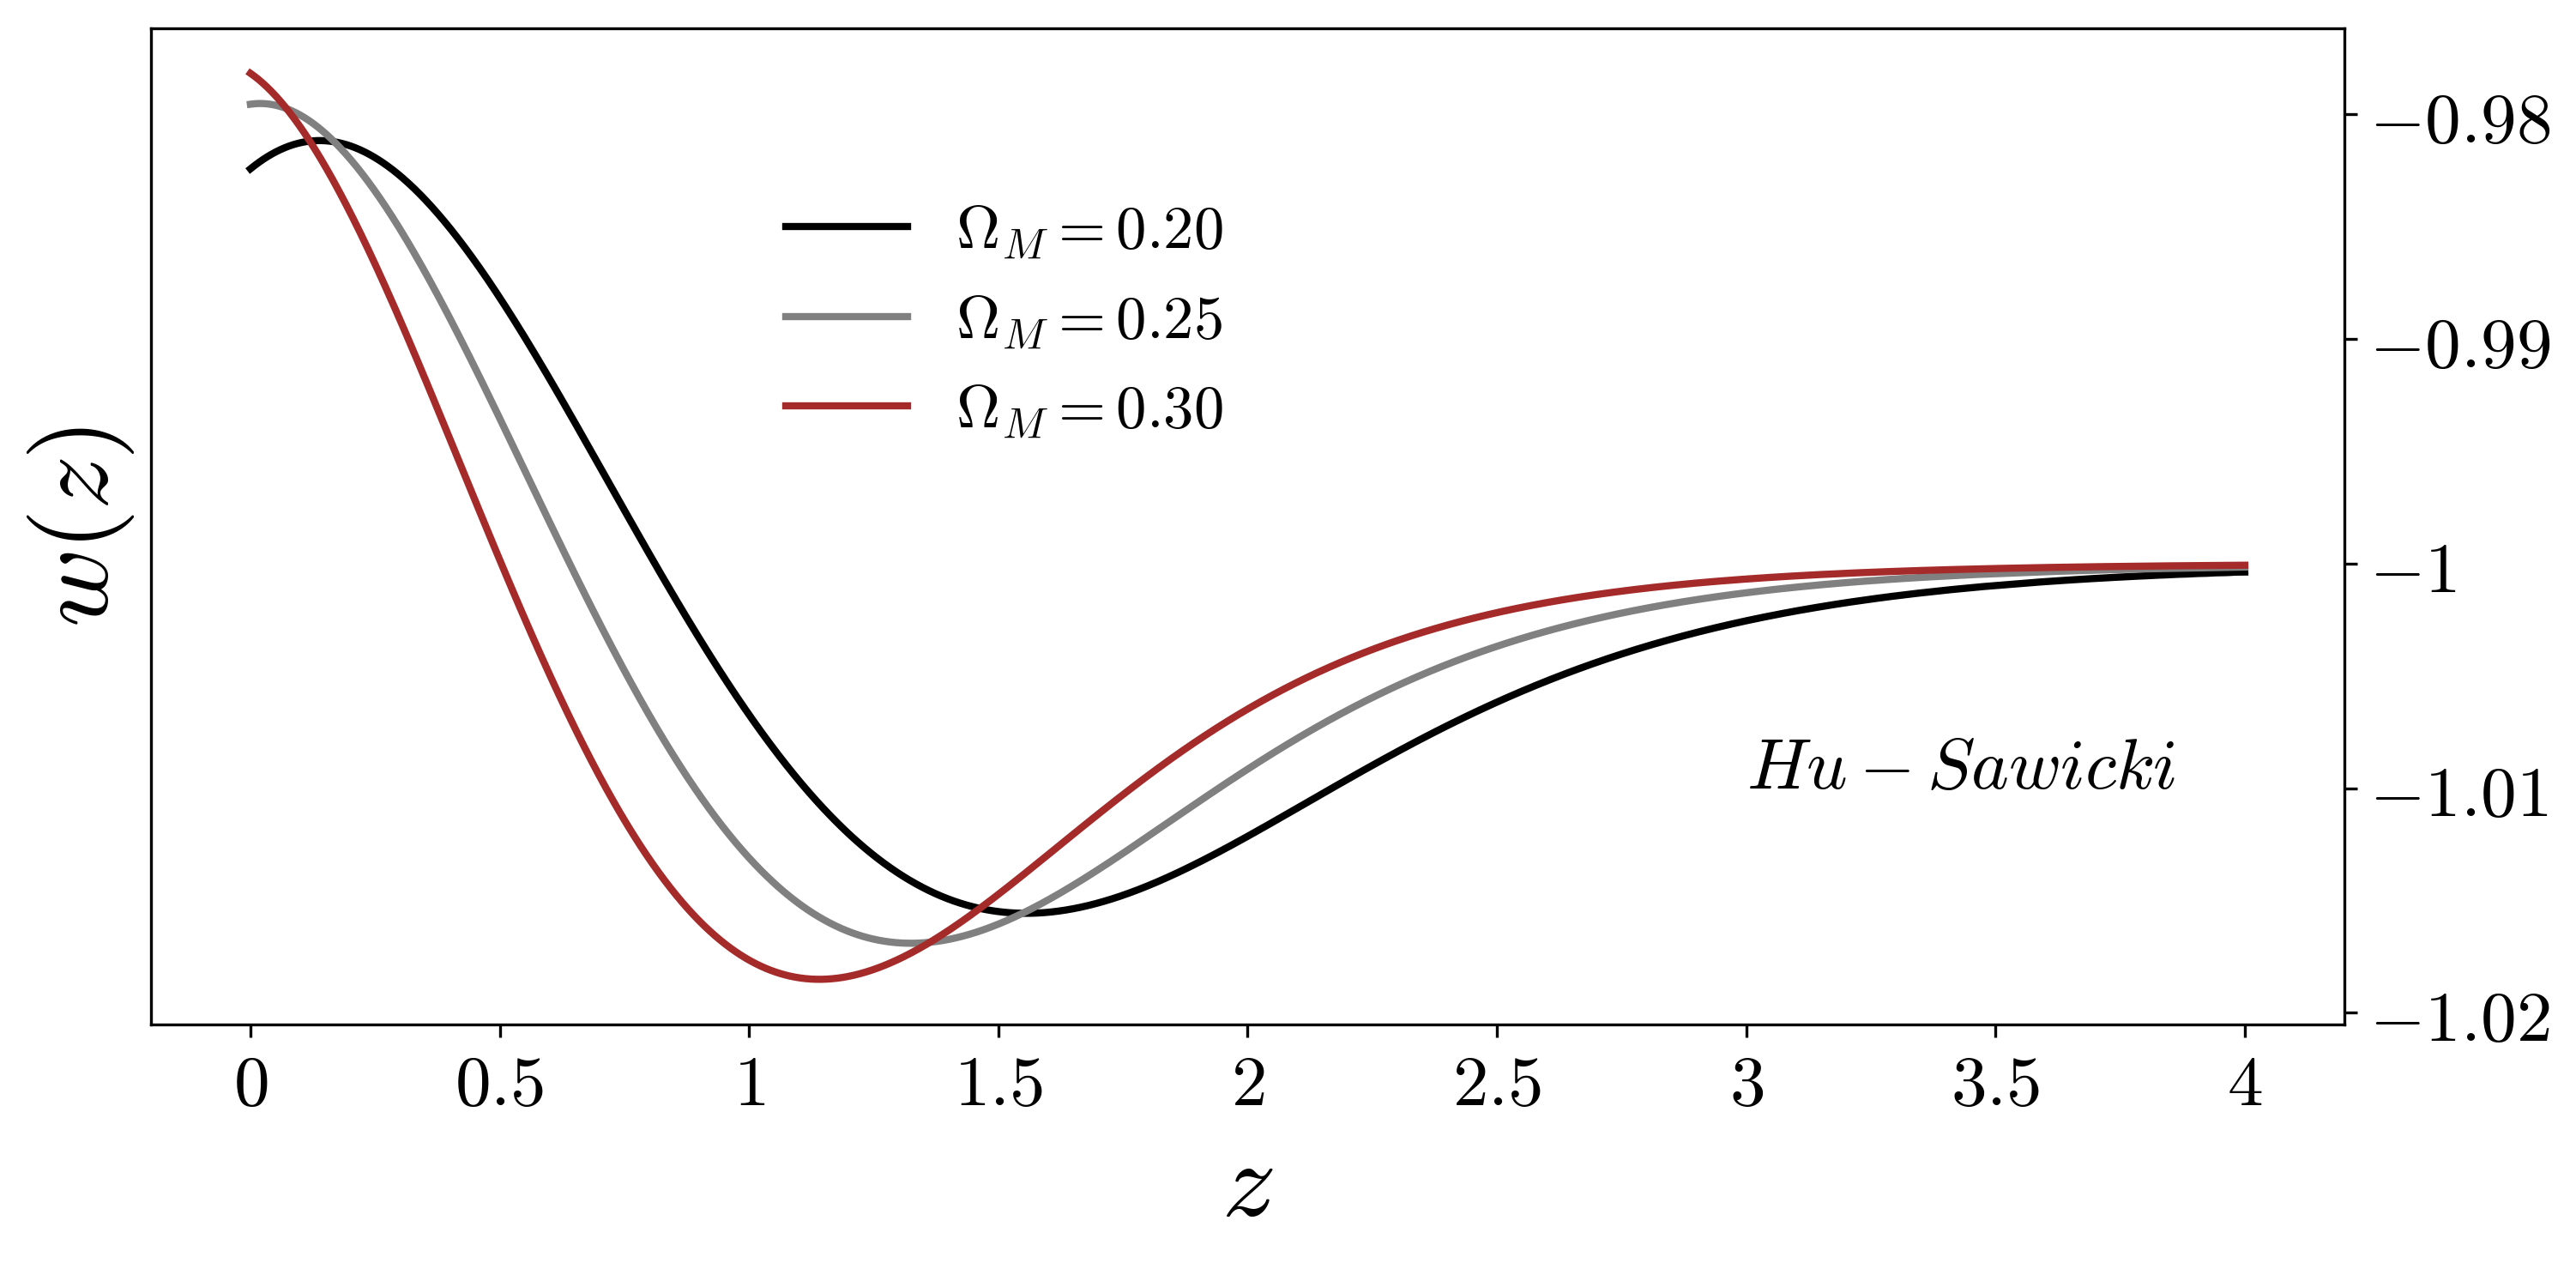

In [4]:
# Size in inches, and dots per inch
figsize = (11, 8)
dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset'] = 'cm'

fig1=figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.08)

subplot(grid_spec[0])
cax = gca()

plot(z1, wx1, ls='-', color="black", label = r'$\Omega_M = 0.20$')
plot(z2, wx2, ls='-', color="grey", label = r'$\Omega_M = 0.25$')
plot(z3, wx3, ls='-', color="brown", label = r'$\Omega_M = 0.30$')

#plot(frdata[:,0], frdata[:,3], ls='--', color="red", label = 'total')
plt.legend(bbox_to_anchor=(0.5, 0.85), loc='best', borderaxespad=0.,prop={'size':17}, frameon=False)
plt.text(3,-1.01, r'$Hu-Sawicki$')



cax.yaxis.set_ticks_position('right') 
cax.yaxis.set_major_formatter(FancyFormatter())
xlabel(r'$z$', fontsize=30)
ylabel(r'$w(z)$', fontsize=30)

#plt.xlim((0,3))
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())

#cax.yaxis.set_ticks_position('left')

#################### Empty subplot  #####################


#savefig('./../../figures/HS-3models.pdf',bbox_inches='tight')


### Fitting for the EoS


$w_{x, param}(z; \bar{w}_0, w_1, w_2, w_3) = -1 + \frac{\bar{w}_0}{1+w_1 z^{w_2}}cos(w_3+z)$


In [5]:
def parametrization(x, w0, w1, w2 ,w3):
    return -1 + (w0/(1+w1*x**w2))*cos(w3+x)

In [6]:
#zdata = np.linspace(0, 4, 13863)

#y = cosfunc(zdata, 0.02,0.04,2,7)




popt1, pcov1 = curve_fit(parametrization, z1, wx1, p0=(0.02,0.04,2,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)
popt2, pcov2 = curve_fit(parametrization, z2, wx2, p0=(0.02,0.04,2,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)
popt3, pcov3 = curve_fit(parametrization, z3, wx3, p0=(0.02,0.04,2,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)

popt1b, pcov1b = curve_fit(parametrization, z1, wx1, p0=(0.02,0.04,4,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)
popt2b, pcov2b = curve_fit(parametrization, z2, wx2, p0=(0.02,0.04,4,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)
popt3b, pcov3b = curve_fit(parametrization, z3, wx3, p0=(0.02,0.04,4,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)

#popt3, pcov3 = curve_fit(cosfunctionphase, zdata, wxcut, p0=(0.02,0.04,2,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)

#popt2, pcov2 = curve_fit(cosfuncpast, zdata, wxcut, p0=(0.02,0.04,2,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)


#popt3, pcov3 = curve_fit(cosreduced, zdata, wxcut, p0=(0.02,0.04,7), maxfev = 10000, ftol=9e-5, xtol=1e-2)

popt1, popt2, popt3, 'bis ',popt1b, popt2b, popt3b

(array([ 0.03085216,  0.07533885,  4.13709086,  7.04241354]),
 array([ 0.04001331,  0.12424538,  4.74053529,  7.21022751]),
 array([ 0.04933123,  0.3101251 ,  4.38372615,  7.34779115]),
 'bis ',
 array([ 0.03207738,  0.06141805,  4.49391835,  7.04668521]),
 array([ 0.04001309,  0.12413106,  4.74262062,  7.21022102]),
 array([ 0.04932629,  0.30991656,  4.39543174,  7.34777436]))

In [7]:
amax(pcov1)/amax(pcov1b)
amax(pcov2)/amax(pcov2b)
amax(pcov3)/amax(pcov3b)

perr1 = np.sqrt(np.diag(pcov1))
perr2 = np.sqrt(np.diag(pcov2))
perr3 = np.sqrt(np.diag(pcov3))

perr1b = np.sqrt(np.diag(pcov1b))
perr2b = np.sqrt(np.diag(pcov2b))
perr3b = np.sqrt(np.diag(pcov3b))

amax(perr1)/amax(perr1b), amax(perr2)/amax(perr2b),amax(perr3)/amax(perr3b)


(1.0646286063605299, 0.99346948926918355, 0.98455518894399263)

In [9]:
w1E1 = 0.0313328163287499;
w2E1 = 0.752186702054856;
w3E1 = 0.034397403809922664;
w4E1 = 5.253856352447935;

w1E2 = 0.04002026800722846;
w2E2 = 0.9270944879859777;
w3E2 = 0.12431606586791219;
w4E2 = 4.741726685198591;

w1E3 = 0.04933494625170081;
w2E3 = 1.0646064294194095;
w3E3 = 0.3099079401724481;
w4E3 = 4.403573517979707;


p1 = [w1E1, w3E1, w4E1, w2E1];
p2 = [w1E2, w3E2, w4E2, w2E2];
p3 = [w1E3, w3E3, w4E3, w2E3];

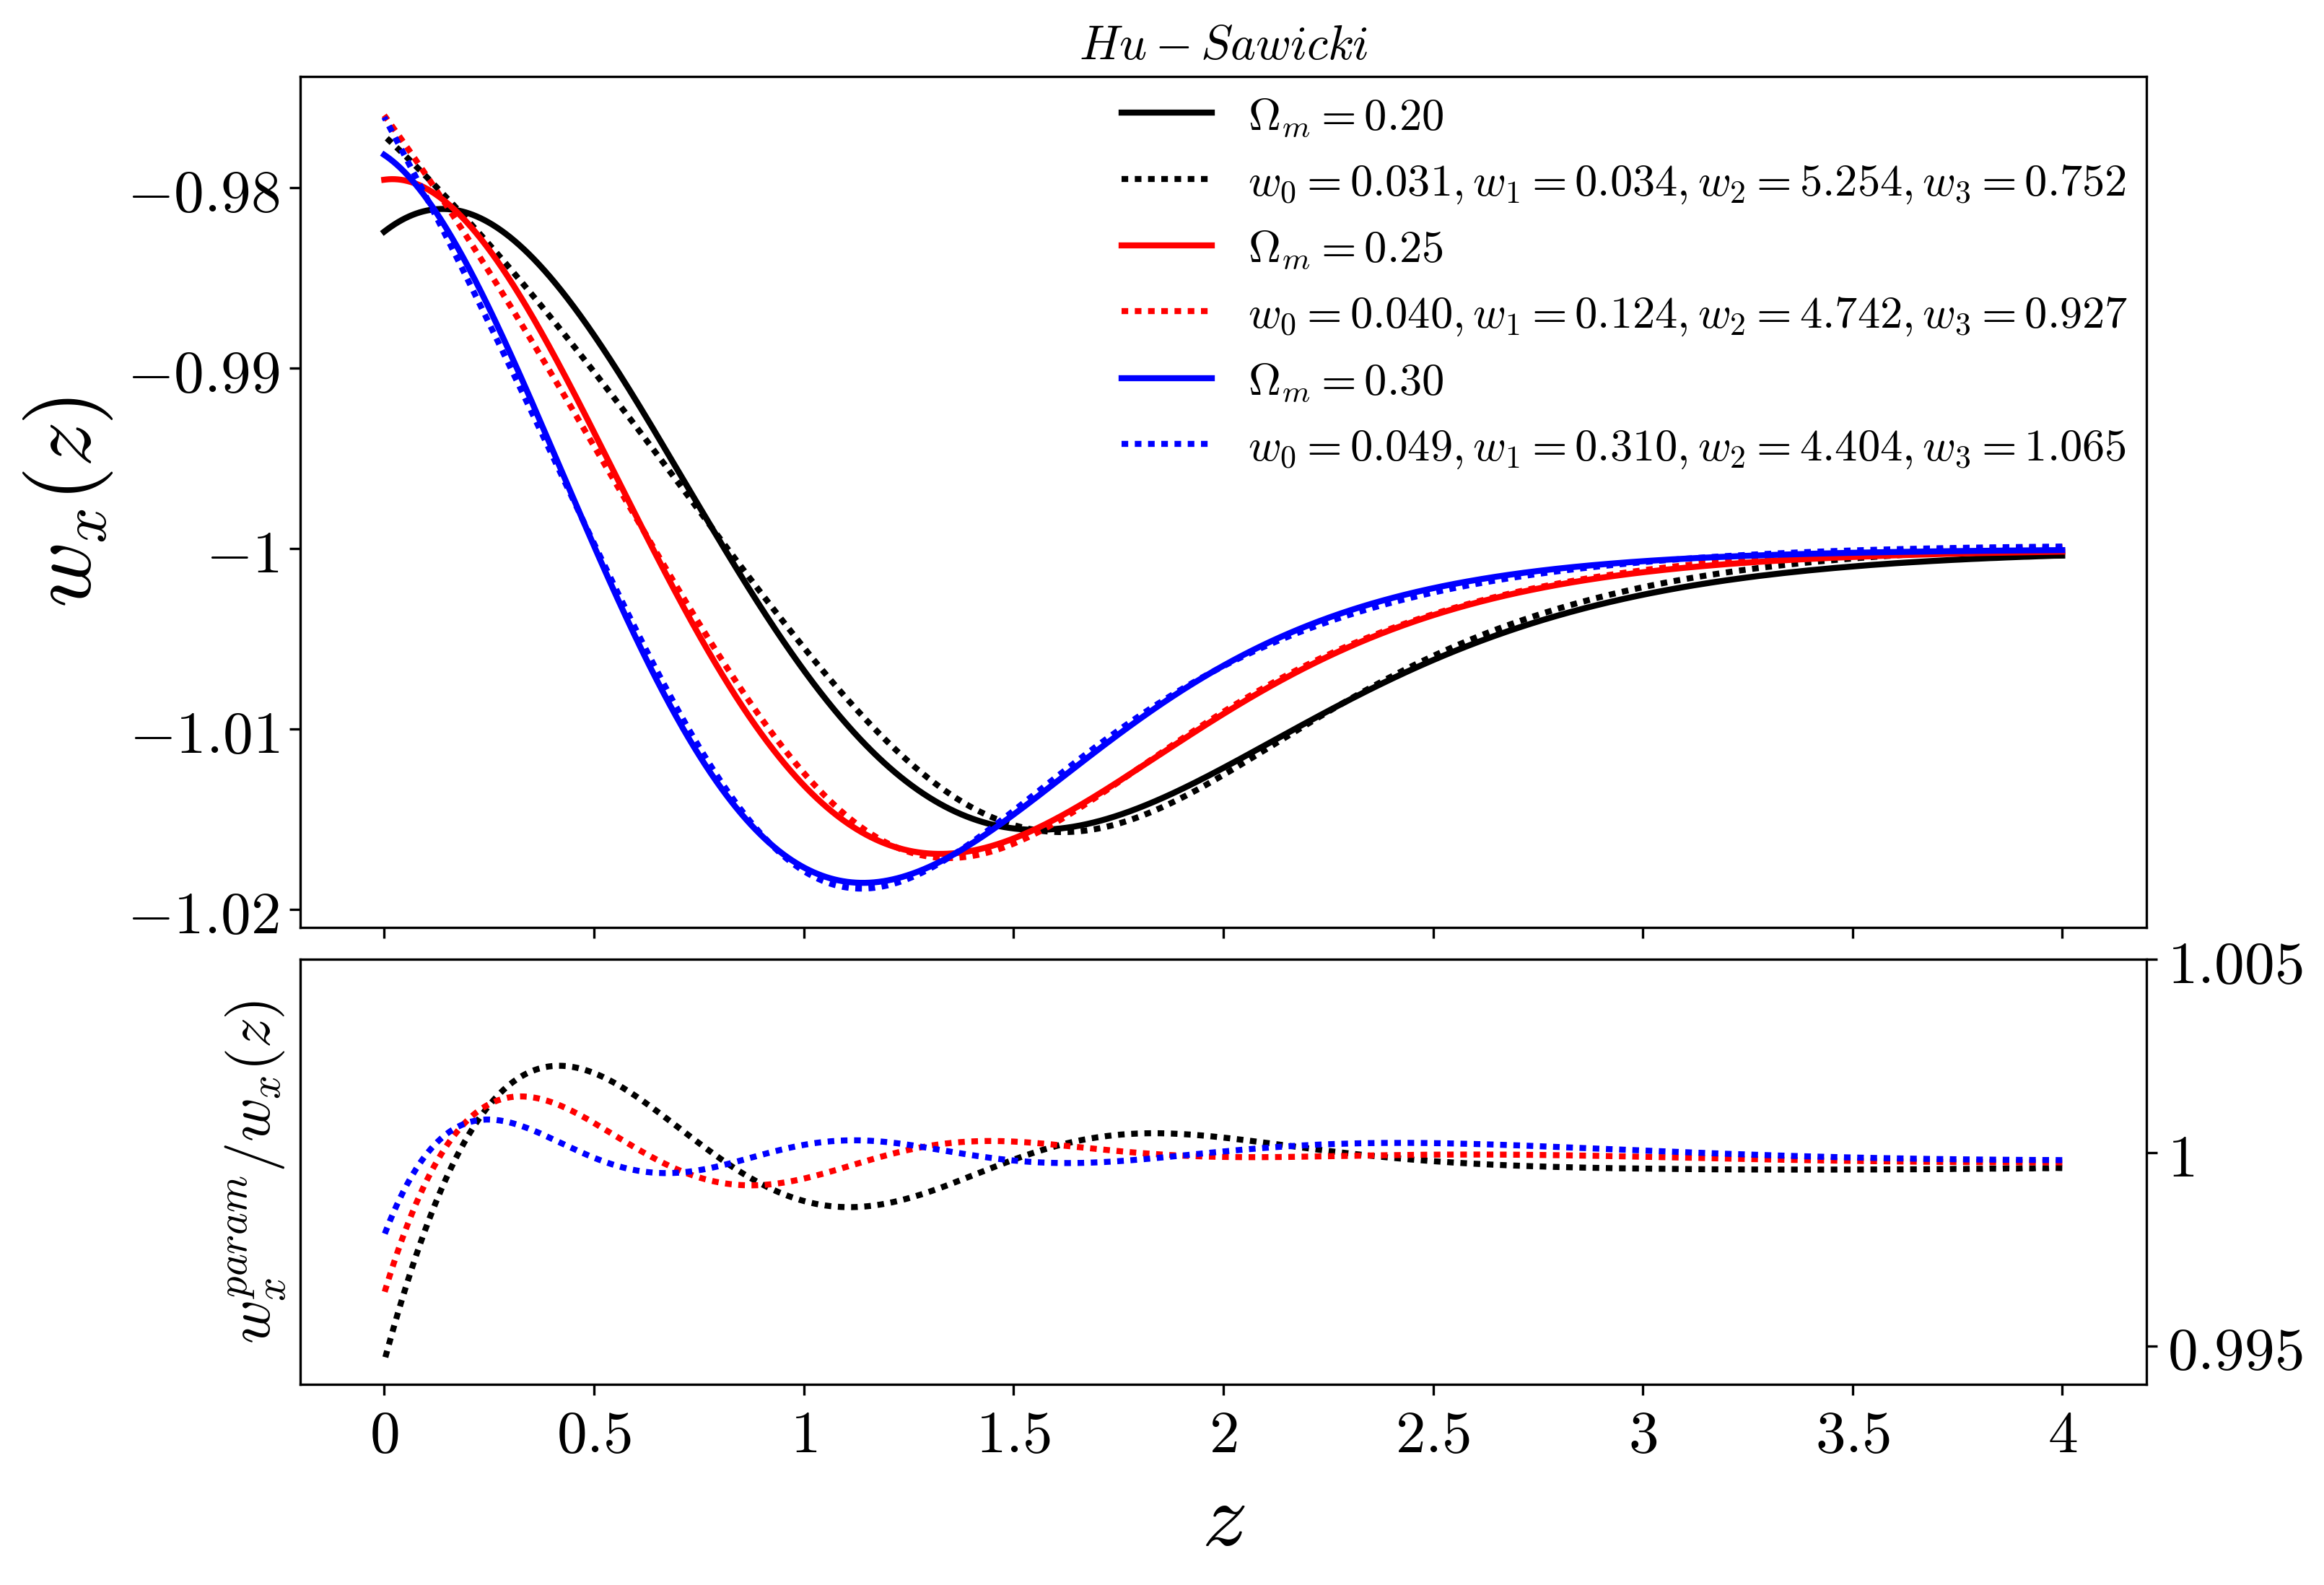

In [11]:
# Size in inches, and dots per inch
figsize = (11, 8)
dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset']='cm'
fig1=figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.05)

subplot(grid_spec[0])
cax = gca()

y1best = parametrization(z1, *popt1)
y2best = parametrization(z2, *popt2)
y3best = parametrization(z3, *popt3)

y1bestb = parametrization(z1, *popt1b)
y2bestb = parametrization(z2, *popt2b)
y3bestb = parametrization(z3, *popt3b)


y1bestm = parametrization(z1, *p1)
y2bestm = parametrization(z2, *p2)
y3bestm = parametrization(z3, *p3)


plot(z1, wx1, color='black', label=r'$\Omega_m=0.20$ ')
plot(z1, y1bestm, color = 'black', ls=':', 
     label=r'$w_0=%5.3f, w_1=%5.3f, w_2=%5.3f, w_3=%5.3f$' % tuple(p1))
plot(z2, wx2, color='red', label=r'$\Omega_m=0.25$ ')

plot(z2, y2bestm, color = 'red', ls=':',
     label=r'$w_0=%5.3f, w_1=%5.3f, w_2=%5.3f, w_3=%5.3f$' % tuple(p2))

plot(z3, wx3, color='blue', label=r'$\Omega_m=0.30$ ')
plot(z3, y3bestm, color = 'blue', ls=':', 
     label=r'$w_0=%5.3f, w_1=%5.3f, w_2=%5.3f, w_3=%5.3f$' % tuple(p3))

plt.title(r'$Hu-Sawicki$', size=16)
#= $-1+\frac{\bar{w}_0}{1+w_1z^{w_2}}cos(w_3 x)$
plt.legend(
    #bbox_to_anchor=(0.45, 0.55), 
    loc='best', borderaxespad=0.,prop={'size':15}, frameon=False)



cax.yaxis.set_ticks_position('left') 
cax.yaxis.set_major_formatter(FancyFormatter())
#xlabel(r'$z$', fontsize=30)
ylabel(r'$w_x(z)$', fontsize=30)

cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())

cax.xaxis.set_ticklabels([], minor=True)
cax.xaxis.set_ticklabels([])

#################### Empty subplot  #####################

subplot(grid_spec[1])
cax2 = gca()
xlabel(r'$z$', fontsize=30)
cax2.xaxis.set_major_formatter(FancyFormatter())

plot(z1, y1bestm/wx1, label = '1', color='black', ls=':')
plot(z2, y2bestm/wx2, label = '2', color='red', ls=':')
plot(z3, y3bestm/wx3, label = '3', color='blue', ls=':')

ylabel(r'$w_{x}^{param}/w_{x}(z)$', fontsize=20)
cax2.yaxis.set_ticks_position('right') 
cax2.yaxis.set_major_formatter(FancyFormatter())

cax2.set_ylim(0.994,1.005)


#savefig('./../../figures/fits_HS-3models-ratio-matemathica.pdf',bbox_inches='tight')
#savefig('./../../../../../f_R-Chi2/code-chi2-bao-sneia-shared/figures/fits_HS-3models-ratio-matemathica.pdf',bbox_inches='tight')




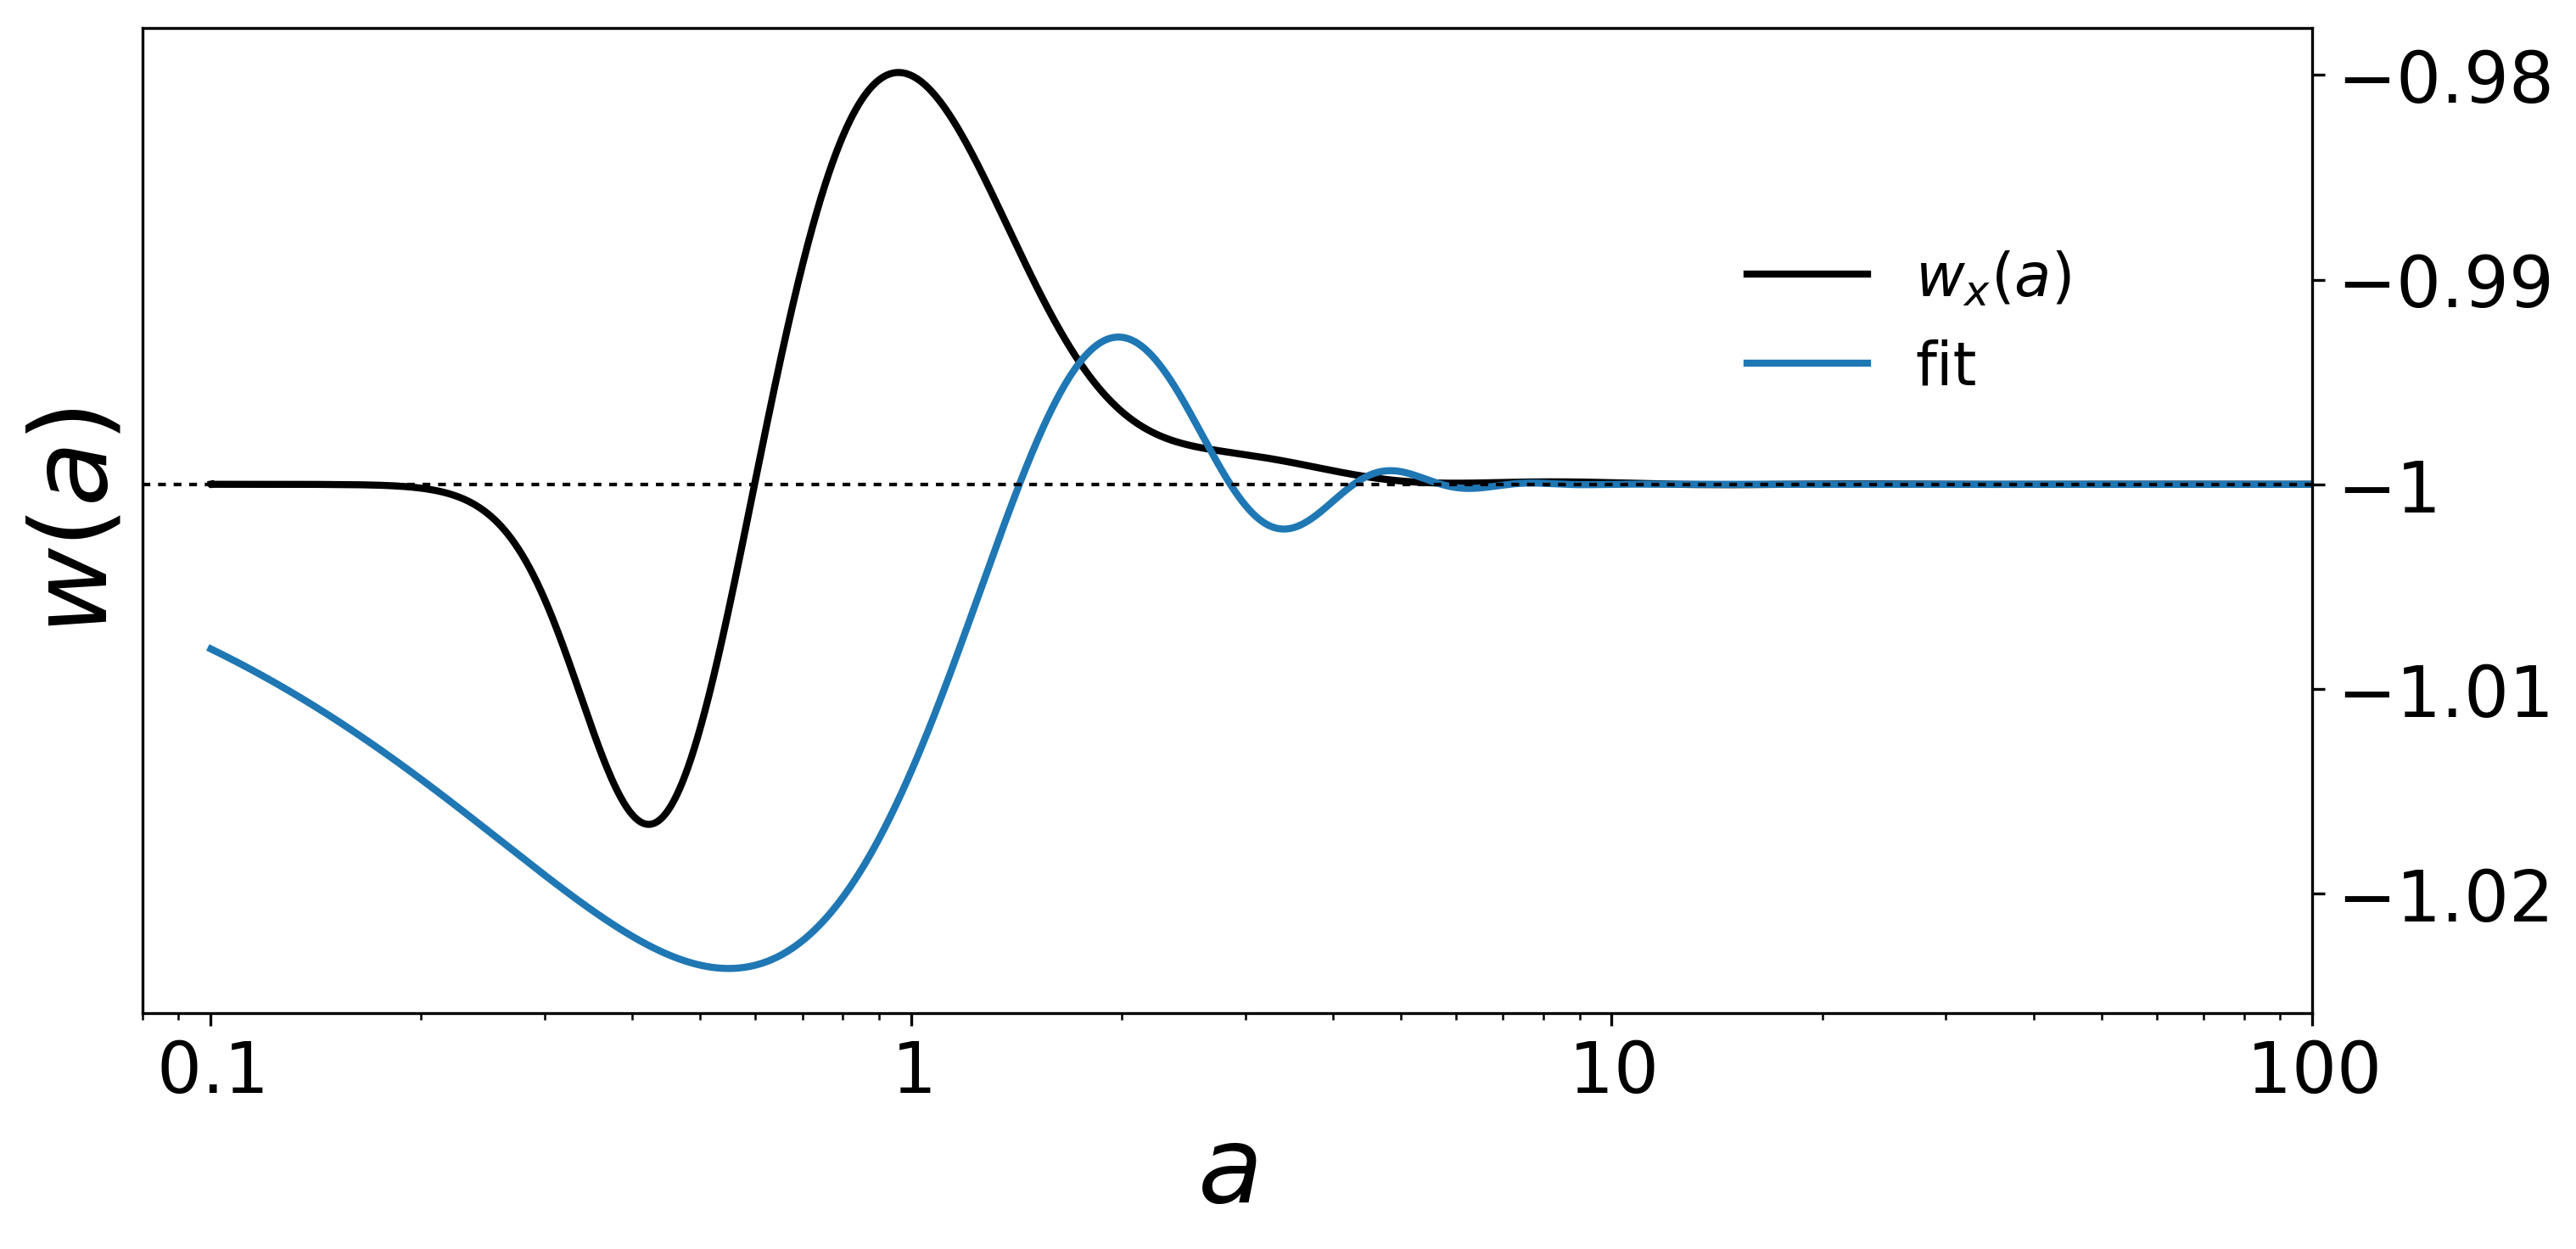